In [18]:
import matplotlib.pyplot as plt
import pandas as pd

In [19]:
print(pd.read_csv("datasets/raw_sales.csv").describe())
print(pd.read_csv("datasets/ma_lga_12345.csv").describe())

           postcode         price      bedrooms
count  29580.000000  2.958000e+04  29580.000000
mean    2730.249730  6.097363e+05      3.250169
std      146.717292  2.817079e+05      0.951275
min     2600.000000  5.650000e+04      0.000000
25%     2607.000000  4.400000e+05      3.000000
50%     2615.000000  5.500000e+05      3.000000
75%     2905.000000  7.050000e+05      4.000000
max     2914.000000  8.000000e+06      5.000000
                 MA    bedrooms
count  3.470000e+02  347.000000
mean   5.481320e+05    2.867435
std    1.701934e+05    1.239875
min    3.167510e+05    1.000000
25%    4.277395e+05    2.000000
50%    5.077440e+05    3.000000
75%    6.275155e+05    4.000000
max    1.017752e+06    5.000000


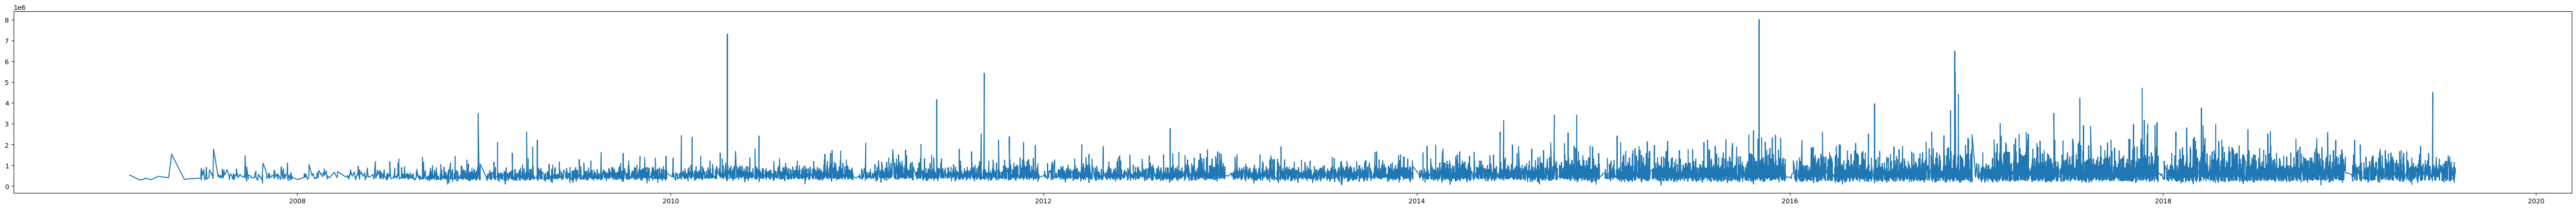

In [20]:
df = pd.read_csv("datasets/raw_sales.csv")

df["datesold"] = pd.to_datetime(df["datesold"])
df["timestamp"] = df["datesold"].astype(int)

df = df.sort_values("datesold")

plt.figure(figsize=(70, 5))
plt.plot(df["datesold"], df["price"])

In [39]:
temp_df = df[["datesold", "price", "timestamp"]]
temp_df["year-month"] = temp_df["datesold"].dt.to_period("Q")
temp_df = temp_df.groupby("year-month").agg(
    {"price": "median", "timestamp": "max"}
).reset_index()
temp_df["price_mean"] = temp_df.groupby("year-month")["price"].mean().values
# temp_df["ctimestamp"] = temp_df["timestamp"]["max"]
# temp_df = temp_df.drop(columns=["timestamp"]).rename(columns={"ctimestamp": "timestamp"})
temp_df["duration"] = temp_df["timestamp"].diff()
temp_df.loc[0, "duration"] = temp_df.loc[1, "duration"]
print(temp_df.describe())
# temp_df = temp_df[temp_df["price"] > 420000]
print(len(temp_df), len(temp_df[temp_df["price"] < 420000]), len(temp_df[temp_df["price"] > 600000]))

               price     timestamp     price_mean      duration
count      51.000000  5.100000e+01      51.000000  5.100000e+01
mean   527935.784314  1.372325e+18  527935.784314  7.813271e+15
std     64120.117993  1.171753e+17   64120.117993  8.476461e+14
min    328000.000000  1.174435e+18  328000.000000  2.419200e+15
25%    496250.000000  1.273925e+18  496250.000000  7.862400e+15
50%    527000.000000  1.372464e+18  527000.000000  7.862400e+15
75%    572000.000000  1.471219e+18  572000.000000  7.948800e+15
max    640000.000000  1.564186e+18  640000.000000  8.812800e+15
51 2 7


/tmp/ipykernel_6576/3317412187.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  temp_df["year-month"] = temp_df["datesold"].dt.to_period("Q")


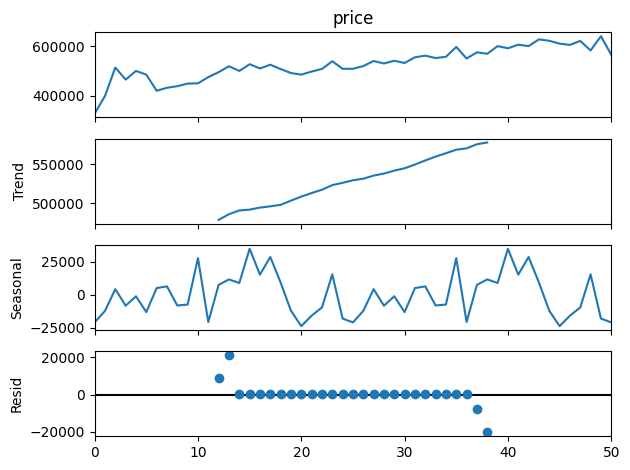

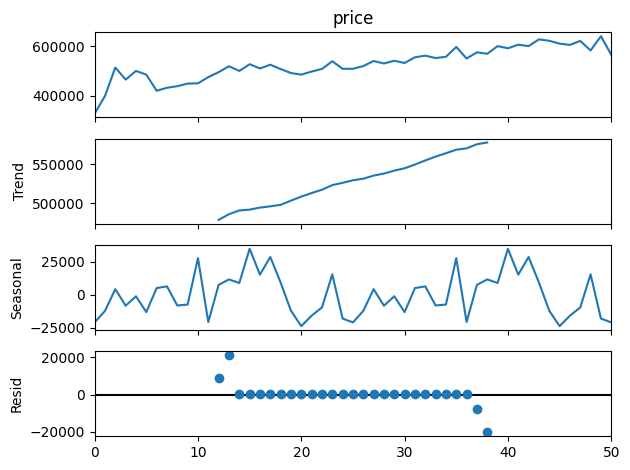

In [22]:
from statsmodels.tsa.seasonal import seasonal_decompose

dcp_df = seasonal_decompose(temp_df["price"], period=len(temp_df) // 2)
dcp_df.plot()

1. ADF :  -1.7923011926991608
2. P-Value :  0.3842905811982174
3. Num Of Lags :  7
4. Num Of Observations Used For ADF Regression and Critical Values Calculation : 43
5. Critical Values :
	 1% :  -3.5925042342183704
	 5% :  -2.931549768951162
	 10% :  -2.60406594375338


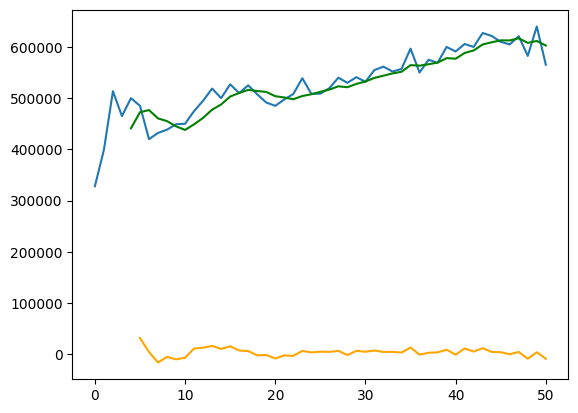

In [23]:
from statsmodels.tsa.stattools import adfuller
adf_df = adfuller(temp_df["price"])

print("1. ADF : ",adf_df[0])
print("2. P-Value : ", adf_df[1])
print("3. Num Of Lags : ", adf_df[2])
print("4. Num Of Observations Used For ADF Regression and Critical Values Calculation :", adf_df[3])
print("5. Critical Values :")
for key, val in adf_df[4].items():
    print("\t",key, ": ", val)

rolling_mean = temp_df["price"].rolling(window=5).mean()
temp_df["rolling_mean"] = rolling_mean
temp_df["rolling_mean_diff"] = rolling_mean - rolling_mean.shift()

plt.plot(temp_df["price"])
plt.plot(temp_df["rolling_mean"], color="green")
plt.plot(temp_df["rolling_mean_diff"], color="orange")

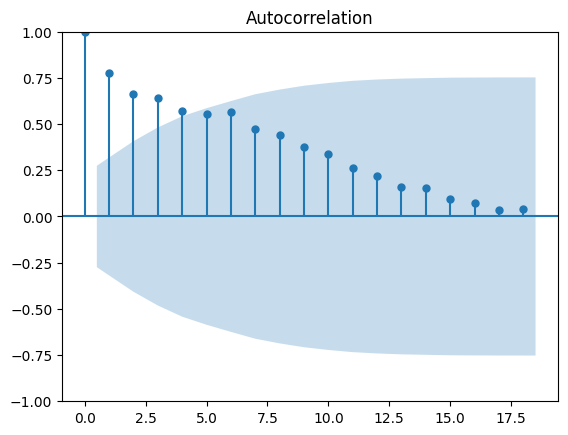

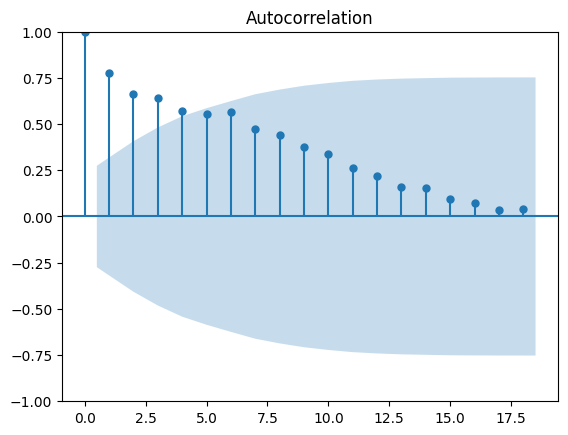

In [24]:
from statsmodels.graphics.tsaplots import plot_acf

plot_acf(temp_df["price"])

/home/frog/Документи/subjects/processing-with-python/lab6/lib/python3.10/site-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'
 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  8.74743D+00    |proj g|=  2.80099D+00

At iterate    5    f=  8.24139D+00    |proj g|=  6.07280D-01

At iterate   10    f=  8.15493D+00    |proj g|=  1.45830D-01

At iterate   15    f=  8.06795D+00    |proj g|=  1.47824D-02

At iterate   20    f=  8.05040D+00    |proj g|=  5.47034D-03

At iterate   25    f=  8.04739D+00    |proj g|=  3.87934D-03

At iterate   30    f=  8.04695D+00    |proj g|=  1.83531D-03

At iterate   35    f=  8.04686D+00    |proj g|=  5.68135D-04

At iterate   40    f=  8.04683D+00    |proj g|=  1.00960D-04

At iterate   45    f=  7.99730D+00    |proj g|=  4.15763D-02

At iterate   50    f=  7.98167D+00    |proj g|=  1.95636D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cau

/home/frog/Документи/subjects/processing-with-python/lab6/lib/python3.10/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


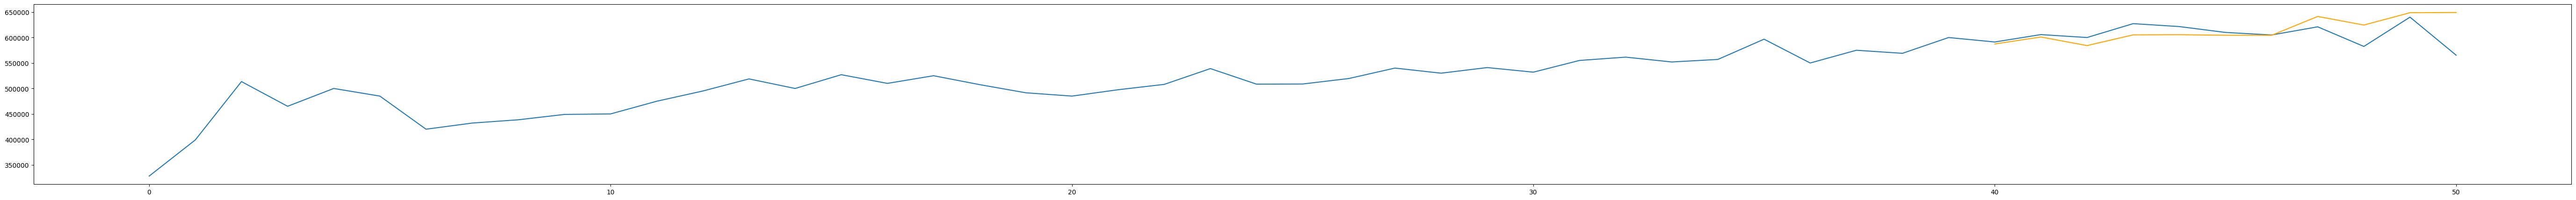

30639.242512747052


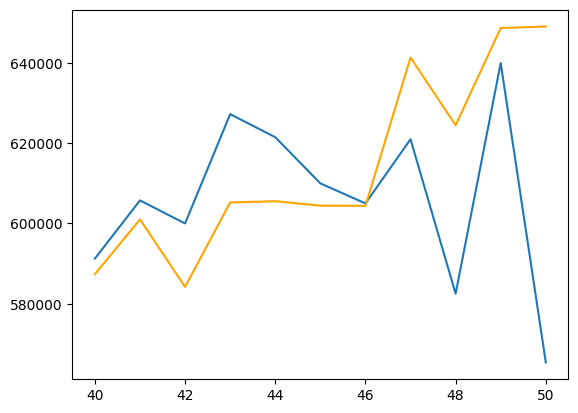

In [58]:
from statsmodels.tsa.statespace.sarimax import SARIMAX
from sklearn.metrics import root_mean_squared_error
from sklearn.model_selection import train_test_split

X_train, X_test = train_test_split(temp_df["price"], test_size=0.2, shuffle=False)

model = SARIMAX(X_train, order=(1, 1, 1), seasonal_order=(1, 1, 1, 12))
results = model.fit()

predicted = results.forecast(steps=len(X_test))

plt.figure(figsize=(70, 5))
plt.plot(temp_df["price"])
plt.plot(predicted, color="orange")
plt.show()
plt.plot(X_test)
plt.plot(predicted, color="orange")

print(root_mean_squared_error(X_test, predicted))

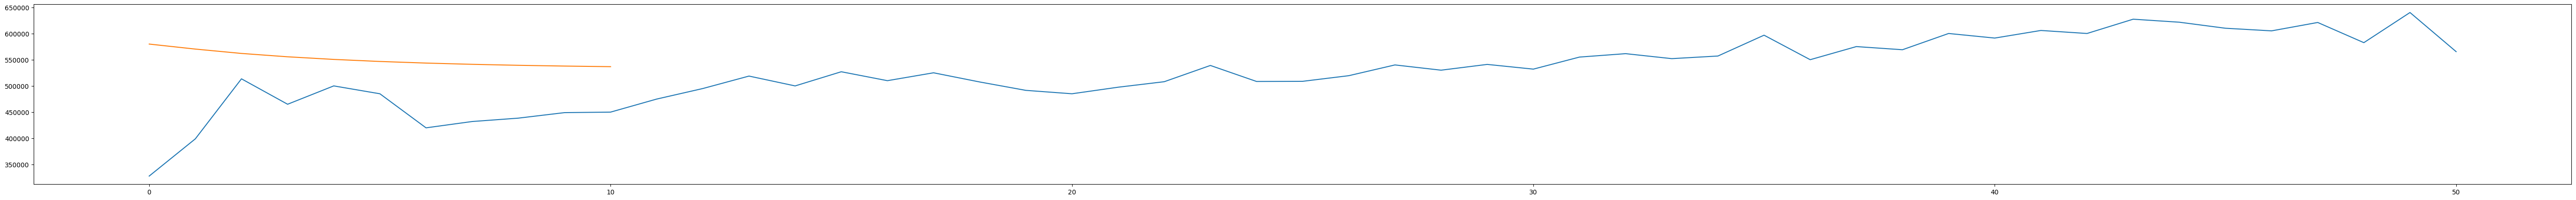

60539.18390521759


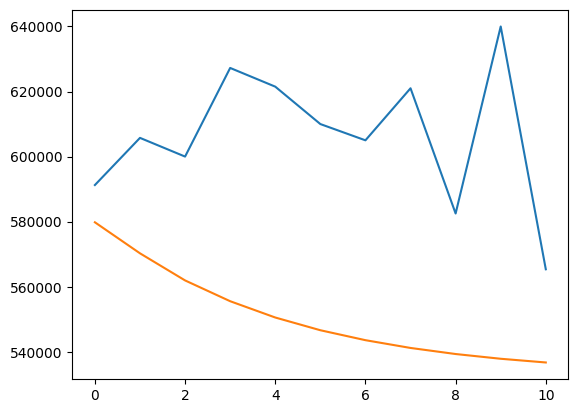

In [48]:
import numpy as np
from statsmodels.tsa.vector_ar.var_model import VAR
# from statsmodels.tsa.statespace.varmax import VARMAX
from sklearn.metrics import root_mean_squared_error
from sklearn.model_selection import train_test_split

X_train, X_test = train_test_split(temp_df[["price", "price_mean"]], test_size=0.2, shuffle=False)

model = VAR(X_train)
results = model.fit(2)
lag = results.k_ar

predicted = results.forecast(X_train.values[-lag:], steps=len(X_test))

plt.figure(figsize=(70, 5))
plt.plot(temp_df[["price"]])
plt.plot(predicted[:, 0])
plt.show()
plt.plot(X_test.reset_index()["price"])
plt.plot(predicted[:, 0])
print(root_mean_squared_error(X_test["price"], predicted[:, 0]))
# plt.show()
# plt.figure(figsize=(70, 5))
# plt.plot(temp_df.reset_index()["price"]["median"])
# plt.plot(predicted["median"], color="orange")
# plt.show()
# plt.figure(figsize=(70, 5))
# plt.plot(temp_df.reset_index()["price"]["min"])
# plt.plot(predicted["min"], color="orange")
# plt.show()
# plt.figure(figsize=(70, 5))
# plt.plot(temp_df.reset_index()["price"]["max"])
# plt.plot(predicted["max"], color="orange")

# with pd.option_context("display.max_rows", None):
#     print(temp_data.iloc[3000:]["price"], res["price"])

-0.8370973444880414


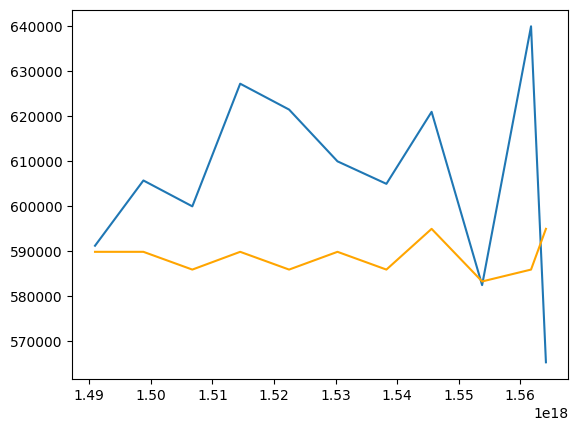

In [56]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(temp_df[["timestamp", "duration"]].values, temp_df["price"].values, test_size=0.2, shuffle=False)

model = RandomForestRegressor()
model = model.fit(X_train, y_train)

predicted = model.predict(X_test)

plt.plot(X_test[:, 0], y_test)
plt.plot(X_test[:, 0], predicted, color="orange")
print(r2_score(y_test, predicted))